In [3]:
library(readr)
dataset <- read_csv("/content/insurance.csv")

Rows: 1338 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): sex, smoker, region
dbl (4): age, bmi, children, expenses

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
#summary of our dataset
summary(dataset)

      age            sex                 bmi           children    
 Min.   :18.00   Length:1338        Min.   :16.00   Min.   :0.000  
 1st Qu.:27.00   Class :character   1st Qu.:26.30   1st Qu.:0.000  
 Median :39.00   Mode  :character   Median :30.40   Median :1.000  
 Mean   :39.21                      Mean   :30.67   Mean   :1.095  
 3rd Qu.:51.00                      3rd Qu.:34.70   3rd Qu.:2.000  
 Max.   :64.00                      Max.   :53.10   Max.   :5.000  
    smoker             region             expenses    
 Length:1338        Length:1338        Min.   : 1122  
 Class :character   Class :character   1st Qu.: 4740  
 Mode  :character   Mode  :character   Median : 9382  
                                       Mean   :13270  
                                       3rd Qu.:16640  
                                       Max.   :63770  

In [5]:
#first few coklumns of our dataset
head(dataset)

age,sex,bmi,children,smoker,region,expenses
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
19,female,27.9,0,yes,southwest,16884.92
18,male,33.8,1,no,southeast,1725.55
28,male,33.0,3,no,southeast,4449.46
33,male,22.7,0,no,northwest,21984.47
32,male,28.9,0,no,northwest,3866.86
31,female,25.7,0,no,southeast,3756.62


Cleaning our dataset

In [6]:
#Removing rows with missing values
cleaned_dataset <- na.omit(dataset)

In [7]:
#Removing ouliers (removing all columns with expense value outside the 3 to 97 percentile interval)
library(dplyr)
cleaned_dataset <- cleaned_dataset %>%
  filter(expenses > quantile(expenses, 0.03) & expenses < quantile(expenses, 0.97))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Visualising our Data

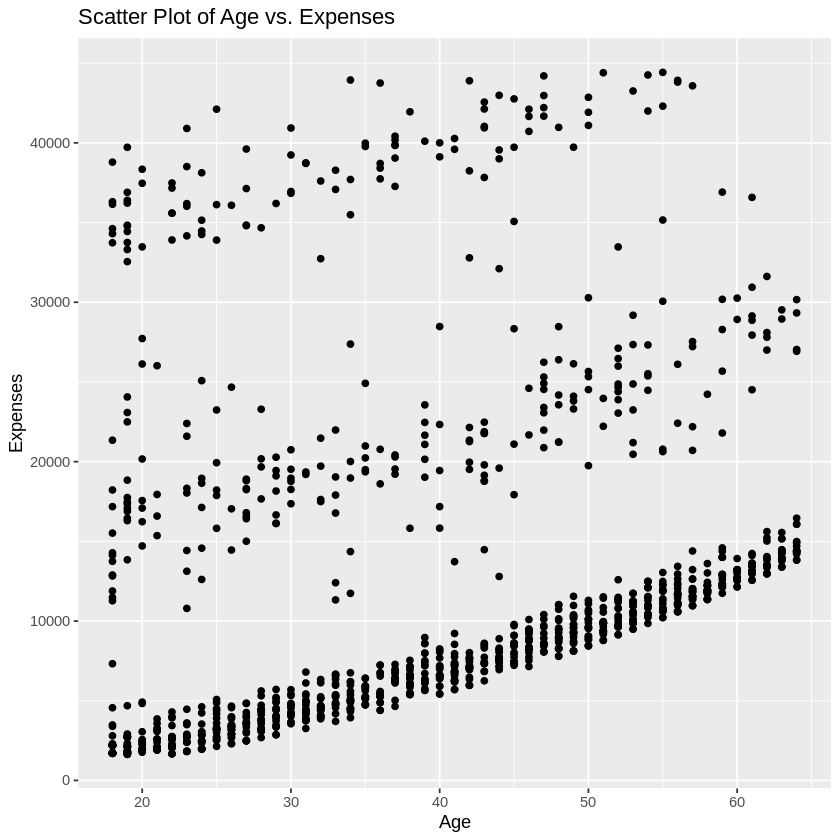

In [8]:
library(ggplot2)

# Scatter plot of age vs. premiums
ggplot(cleaned_dataset, aes(x = age, y = expenses)) +
  geom_point() +
  labs(x = "Age", y = "Expenses", title = "Scatter Plot of Age vs. Expenses")

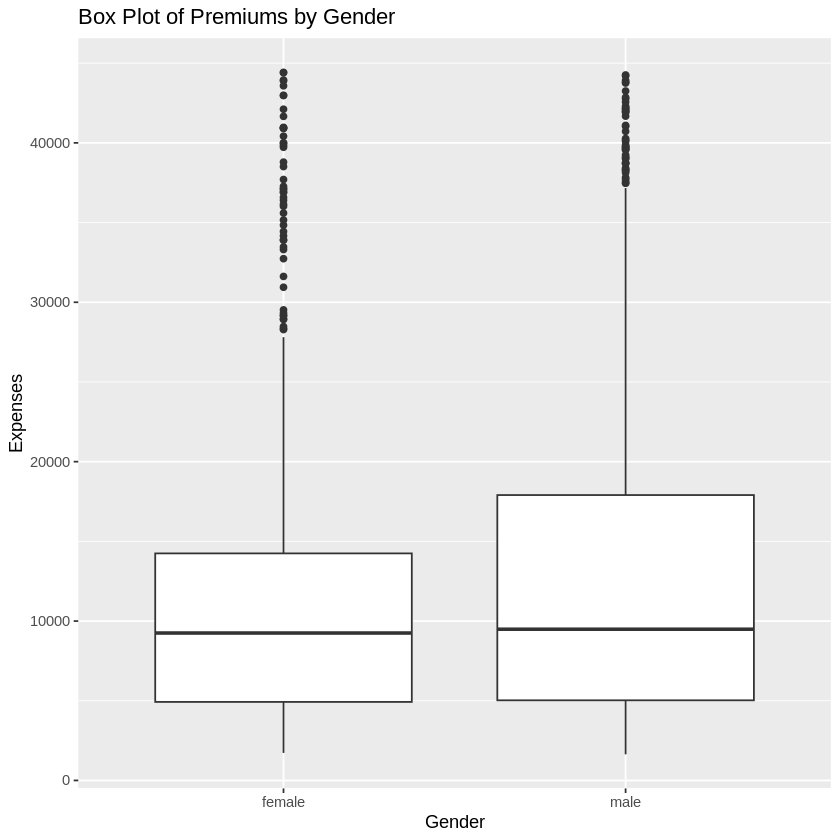

In [9]:
# Box plot of premiums by gender
ggplot(cleaned_dataset, aes(x = sex, y = expenses)) +
  geom_boxplot() +
  labs(x = "Gender", y = "Expenses", title = "Box Plot of Premiums by Gender")

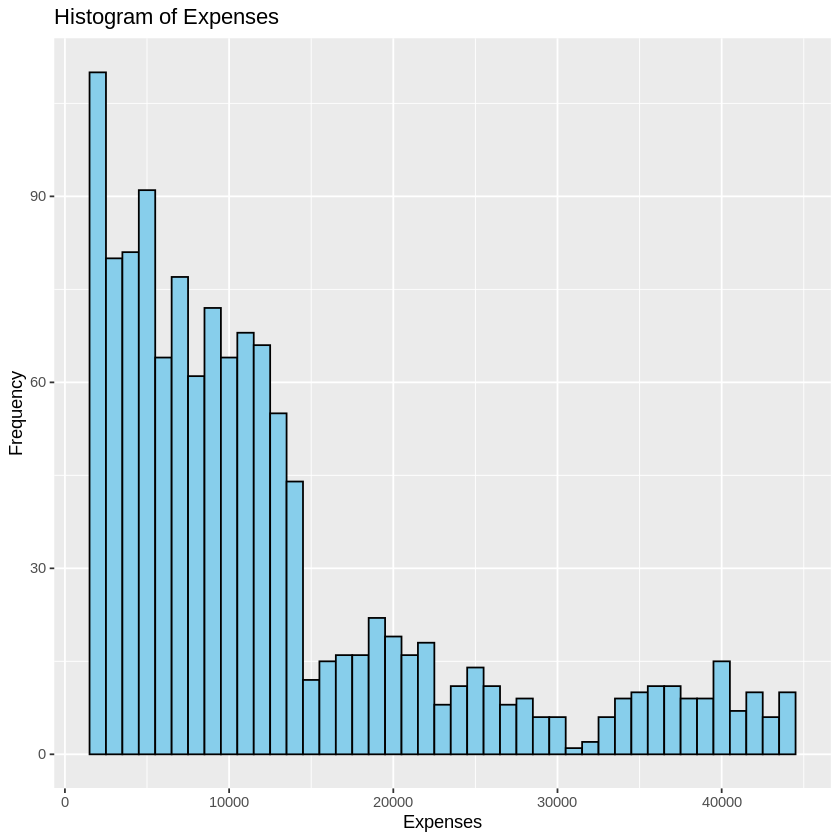

In [10]:
# Histogram of premiums
ggplot(cleaned_dataset, aes(x = expenses)) +
  geom_histogram(binwidth = 1000, fill = "skyblue", color = "black") +
  labs(x = "Expenses", y = "Frequency", title = "Histogram of Expenses")

In [13]:
#Defining health_habits
#health_habits = bmi + (3*smoker)
# Fit linear regression model
linear_model <- lm(expenses ~ age + sex + region + bmi + smoker, data = cleaned_dataset)

# Summary of the linear regression model
summary(linear_model)



Call:
lm(formula = expenses ~ age + sex + region + bmi + smoker, data = cleaned_dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-10464.3  -2928.3  -1205.2    809.5  24537.9 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -8426.61     993.50  -8.482   <2e-16 ***
age               228.81      12.05  18.986   <2e-16 ***
sexmale           -23.73     327.10  -0.073   0.9422    
regionnorthwest  -402.67     460.39  -0.875   0.3819    
regionsoutheast  -829.11     469.87  -1.765   0.0779 .  
regionsouthwest  -973.24     464.52  -2.095   0.0364 *  
bmi               277.53      28.75   9.653   <2e-16 ***
smokeryes       21657.66     425.64  50.882   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5765 on 1248 degrees of freedom
Multiple R-squared:  0.6966,	Adjusted R-squared:  0.6949 
F-statistic: 409.4 on 7 and 1248 DF,  p-value: < 2.2e-16
